In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
print(pd.__version__)

1.1.3


## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [3]:
#a)
#Your code:
df = pd.read_csv('kc_house_data.csv')
df['date'] = pd.to_datetime(df['date'])  # convert str format to datetime
df.info()

# Here is a scheme of a dataframe
#Hint: read_csv(), head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [4]:
df.head()
# Here is the five top records

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(df.columns) # all the features

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
#b) 
numerical_features_df = df.drop(['waterfront', 'zipcode', 'yr_renovated','date', 'id'], axis=1)
numerical_features_df

# waterfront - 0 or 1 - no need to analyze
# zipcode - is not sensible to basic mathematical operations (+, -, * ...)
# yr_renovated - does not make much sense because houses that were never renovated 
# are said to be renovated last time in the 0 year, which comes to contradiction with the yr_built variable. 
# id - variable identifying the entry, not characterizing it.
# date - could be a numeric feature, but it needs to be converted to some other numeric type, in order to calculate std()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,47.5345,-122.069,1410,1287


In [7]:
categorical_features_df = df.drop(numerical_features_df.columns, axis=1)
categorical_features_df

,id,date,waterfront,yr_renovated,zipcode
0,7129300520,2014-10-13,0,0,98178
1,6414100192,2014-12-09,0,1991,98125
2,5631500400,2015-02-25,0,0,98028
3,2487200875,2014-12-09,0,0,98136
4,1954400510,2015-02-18,0,0,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,0,0,98103
21609,6600060120,2015-02-23,0,0,98146
21610,1523300141,2014-06-23,0,0,98144
21611,291310100,2015-01-16,0,0,98027


In [8]:
#c)
#Your code:
numerical_features_df.describe(datetime_is_numeric=True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

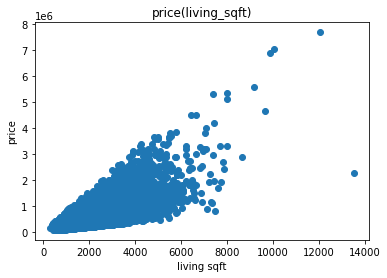

In [10]:
#a)
#Your code:
plt.title('price(living_sqft)')
plt.xlabel('living sqft')
plt.ylabel('price')
plt.scatter(df['sqft_living'], df['price'])
plt.show()
#Hint plt.scatter

"""
On the bellow plot we can see a relation between the price and the living area of the houses stored in the dataframe.
It is clear that when the living_sqft variable increases, price grows as well. The bigger is living_sqft, the more 
quantitative gets set of outliners. We can see that there are several buildings with a giant living area but with a
relatively low price.
"""

In [10]:
df[df['sqft_living'] > 13000] # there is the most vivid outliner. Although the gade and the view parameters are extremely high, 
                              # the price is suprisingly small. 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


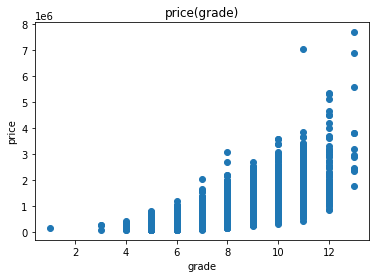

In [11]:
#b)
#Your code:
plt.title('price(grade)')
plt.xlabel('grade')
plt.ylabel('price')
plt.scatter(df['grade'], df['price'])
plt.show()


# Here is presented a price vs grade relationship. On average, the greater is grade, the bigger is price, 
# though there are a few cheap houses in all the grade categories.

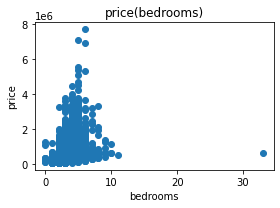

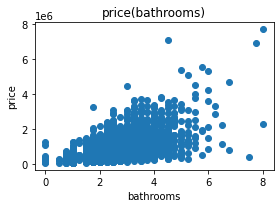

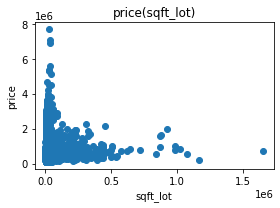

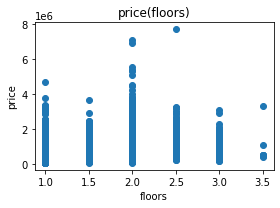

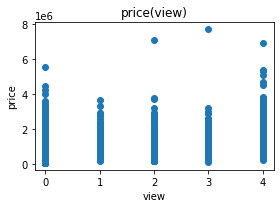

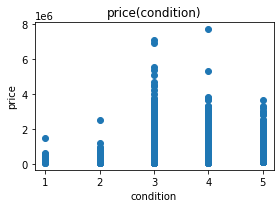

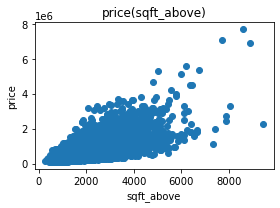

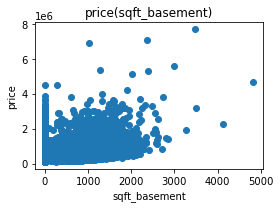

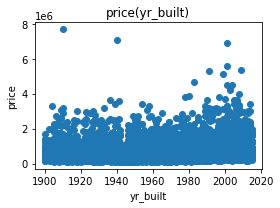

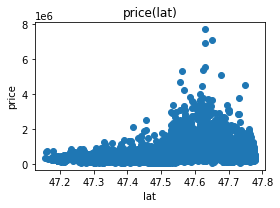

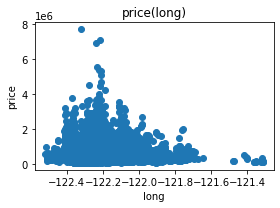

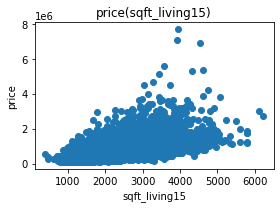

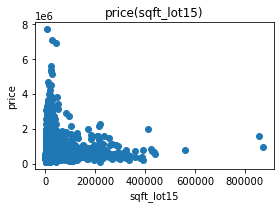

In [12]:
used = set(['grade', 'sqft_living', 'price'])
for name in numerical_features_df.columns:
    if name not in used:
        plt.figure(figsize=(4, 3))
        plt.title(f'price({name})')
        plt.ylabel('price')
        plt.xlabel(name)
        plt.scatter(numerical_features_df[name], numerical_features_df['price'])
        plt.tight_layout()

In [11]:
# price(bedrooms)  - > almost all the houses have bedrooms in the range from 0 to 10.
#                     We can observe that the houses with 4-5 bedrooms have in general the highest prices.       
#                     There is one outliner with more than 30 bedrooms, though with a incomparably low cost.
#
# price(bathrooms) - > We can see some kind of nonlinear dependency between those two variables.
#
# price(sqft_lot)  - > In general, the lowest is the mentioned parameter, the bigger is the price.
#
# price(floors)    - >  Houses with two floors tend to have a bigger price.  
#
# price(view)      - >  It does make sense that the buildings with the best view are the most expensive, 
#                       though there could be some other factors that may bee impactful
#
# price(condition) - > The houses within estimated condition equal to 3 seem to have a decent price. There are also houses
#                      whose condition rate is bigger and they possess a high price as well. Houses with a poor condition justifiably
#                      are being sold for less money.
#
# price(sft_above)  - > Apparently, there is some kind of correlation between those two parameters.
#
# price(sqft_basement) - > Mostly all houses are saturated in the range from 0 to 3000 sqft. Houses outside of this range
#                          resemble some randomly distributed data and it is difficult to investigate any correlations.
#
# price(yr_built) -> This variable does not seem to influence the price profoundly but there are some outliners: 
#                    several extremely old buildings (may be historical ) that cost a fortune and some newly-built buildings that
#                    were sold for a lot of money too.
# 
# price(lat), price(long)  -> a saturation of decent houses within some latitude and longitude may suggest the existence 
#                             of rich neighborhoods
#
# price(sqft_lot15)  - > In general, the lowest is the mentioned parameter, the bigger is the price.
# price(sqft_living15) - > With growth of sft_living15, price increases as well.

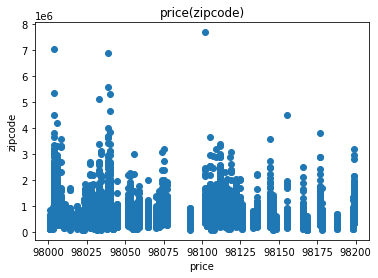

In [13]:
#c)
#Your code:
plt.title(f'price(zipcode)')
plt.ylabel('zipcode')
plt.xlabel('price')
plt.scatter(df['zipcode'], df['price'])
plt.show()

# the below plot shows us how the price is dependent on zipcode. There is no obvious correlation, though there are several 
# outliners within particular zipcodes with vividly high price difference.

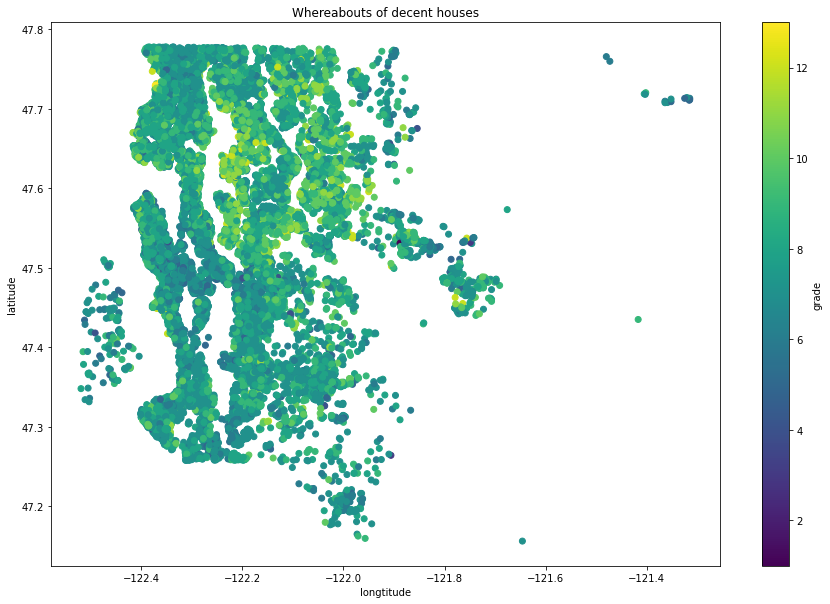

In [14]:
plt.figure(figsize=(15, 10))
plt.ylabel('latitude')
plt.xlabel('longtitude')
plt.title('Whereabouts of decent houses')
plt.scatter(x=df['long'], y=df['lat'], c=df['grade'])
clb = plt.colorbar()
clb.set_label('grade')
plt.show()

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

       grade     price
0          7  221900.0
1          7  538000.0
2          6  180000.0
3          7  604000.0
4          8  510000.0
...      ...       ...
21608      8  360000.0
21609      8  400000.0
21610      7  402101.0
21611      8  400000.0
21612      7  325000.0

[21613 rows x 2 columns]


<AxesSubplot:title={'center':'price'}, xlabel='grade'>

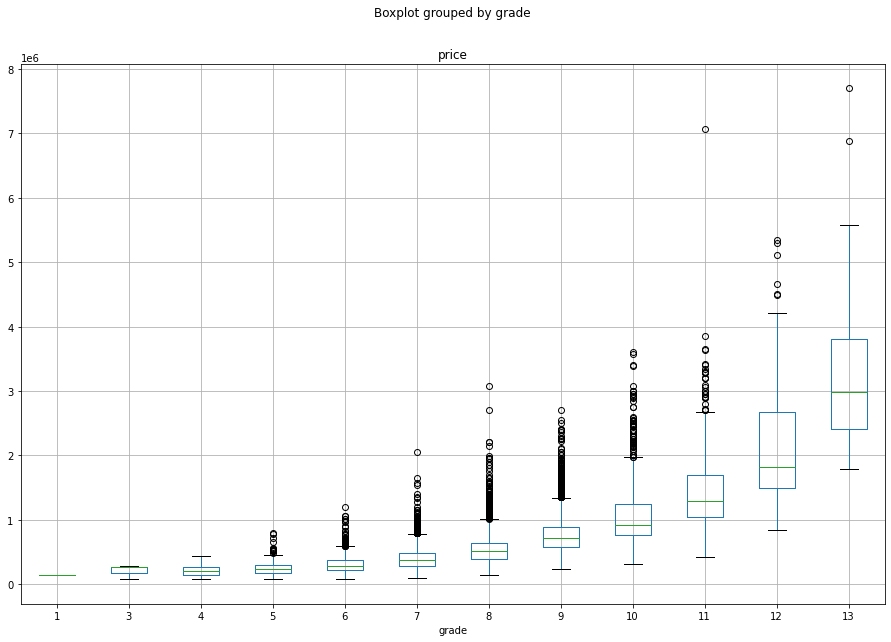

In [15]:
#a)
#Your code:
print(df[['grade', 'price']])
df.boxplot(column='price', by='grade', figsize=(15, 10))

#Hint: plt.boxplot

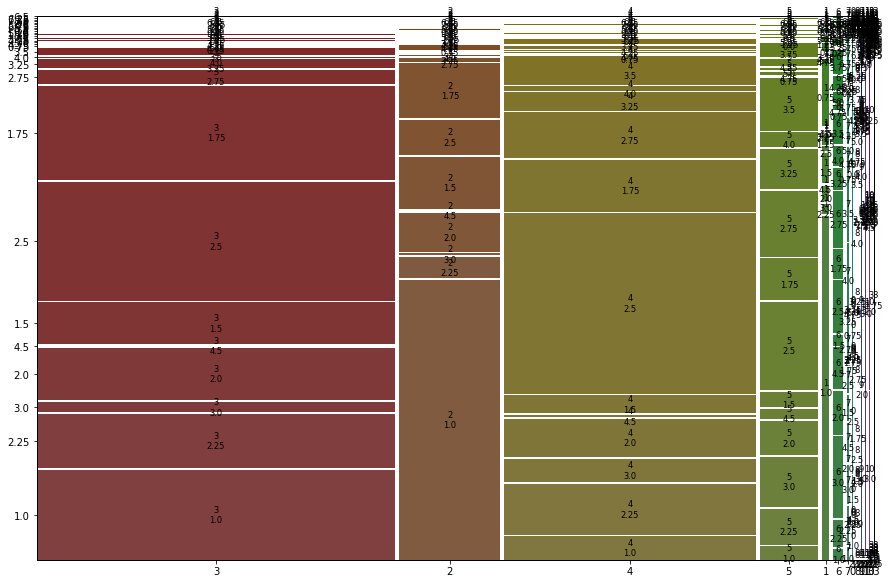

In [16]:
#b)
from statsmodels.graphics.mosaicplot import mosaic
with plt.rc_context():
    plt.rc("figure", figsize=(15,10))
    m = mosaic(df, ['bedrooms', 'bathrooms'])

#Your code:



## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [17]:
num_df = numerical_features_df
filtered_df = num_df[(num_df['bedrooms'] == 3) & (num_df['bathrooms'] == 2) & (num_df['floors'] == 2)]
filtered_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
16,395000.0,3,2.0,1890,14040,2.0,0,3,7,1890,0,1994,47.7277,-121.962,1890,14018
150,532170.0,3,2.0,1360,3090,2.0,0,3,8,1360,0,1990,47.6838,-122.353,1500,3090
294,550000.0,3,2.0,1970,4166,2.0,3,5,8,1270,700,1929,47.5717,-122.375,2390,4166
365,465000.0,3,2.0,1840,40438,2.0,0,3,7,1840,0,1994,47.4853,-121.709,1380,44049
462,230000.0,3,2.0,1510,3413,2.0,0,3,7,1510,0,1985,47.3912,-122.167,1570,3777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20906,274900.0,3,2.0,1936,6612,2.0,0,3,7,1936,0,2014,47.2602,-122.246,1620,21600
20952,549900.0,3,2.0,1280,960,2.0,0,3,9,1040,240,2014,47.6020,-122.311,1280,1173
21220,372000.0,3,2.0,1330,1042,2.0,0,3,8,1060,270,2014,47.5522,-122.382,1440,2428
21531,346000.0,3,2.0,1060,1184,2.0,0,3,7,730,330,2006,47.5443,-122.385,1270,1601


In [18]:
#a)
#Your code:
filtered_df.describe()

#Hint: pandas.DataFrame.loc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,47.567376,-122.247091,1802.337662,17545.123377
std,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,0.143221,0.150507,453.210930,40404.134611
min,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,47.194700,-122.519000,850.000000,886.000000
25%,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,47.498800,-122.361750,1452.500000,4020.000000
50%,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,47.584750,-122.299500,1725.000000,6278.000000
75%,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,47.682400,-122.149250,2117.500000,10392.250000
max,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,47.777000,-121.709000,3170.000000,273992.000000


In [19]:
class Plotter(object):
    
    def __init__(self, data=None):
        self.data = data
        
    def __call__(self, x_name: str, y_name: str, **kwargs):
        plt.title(f'{y_name}({x_name})')
        plt.xlabel(f'{x_name}')
        plt.ylabel(f'{y_name}')
        return plt.scatter(self.data[x_name], self.data[y_name], **kwargs)
        
    @staticmethod
    def show():
        plt.show()
    

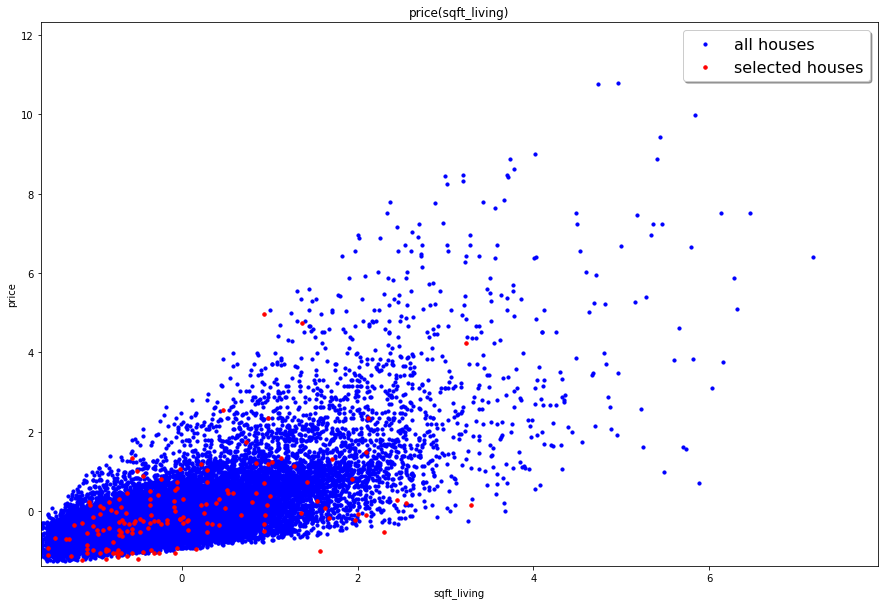

In [23]:
#b)
#Your code:
fig = plt.figure(figsize=(15, 10))
# axis - axis for the function to be applied on.
std_num_df = (num_df - num_df.mean(axis=0))/num_df.std(axis=0)  # mean standardization
std_filtered_df  = (filtered_df - filtered_df.mean(axis=0))/filtered_df.std(axis=0)  # mean standardization

std_num_df = std_num_df.drop(list(std_filtered_df.index), axis=0)

plotter = Plotter(std_num_df)
all_houses = plotter('sqft_living', 'price',color='blue', s=10, label='all houses')
distinct_plotter = Plotter(std_filtered_df)
selected_houses = distinct_plotter('sqft_living', 'price', color='red', s=12, label='selected houses')

scale_factor = 0.6
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.legend(loc='upper right',
          fancybox=True, shadow=True, prop={'size': 16})
Plotter.show()

In [24]:
#c)
#Your code:
price_to_footage = filtered_df['price'] / filtered_df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']].sum(axis=1)
price_to_footage = price_to_footage.to_frame(name='price_to_footage')
filtered_df_conc= pd.concat([filtered_df, price_to_footage], axis=1)
# filtered_df['price_to_footage'] = price_to_footage
filtered_df_sorted = filtered_df_conc.sort_values(by='price_to_footage')
filtered_df_sorted
#Hint: .loc, .sort_values(), .index

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,price_to_footage
4540,550000.0,3,2.0,3650,843309,2.0,0,4,7,3650,0,1991,47.3627,-122.496,1870,273992,0.646596
13886,575000.0,3,2.0,2690,435600,2.0,0,3,8,2690,0,1992,47.3477,-122.519,1700,163350,1.303914
19462,439000.0,3,2.0,2010,251341,2.0,0,3,8,1510,500,2003,47.7416,-121.910,1780,108900,1.719135
7281,440000.0,3,2.0,1860,217800,2.0,2,3,8,1860,0,1998,47.5157,-122.107,2500,217800,1.986277
18201,608000.0,3,2.0,2400,217800,2.0,0,3,8,1590,810,1975,47.4166,-121.940,2340,207781,2.731357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,850000.0,3,2.0,1540,3600,2.0,0,3,8,1540,0,1900,47.6343,-122.283,2970,3600,127.245509
2994,570000.0,3,2.0,1400,1657,2.0,0,3,8,1060,340,2004,47.6196,-122.298,1540,2275,127.888714
5827,1697000.0,3,2.0,2600,6600,2.0,4,3,10,1930,670,1970,47.6055,-122.285,2670,6270,143.813559
20952,549900.0,3,2.0,1280,960,2.0,0,3,9,1040,240,2014,47.6020,-122.311,1280,1173,156.221591


### Sorting only by sqft_living

In [25]:
p_to_f = filtered_df.loc[:, 'price'] / filtered_df.loc[:, 'sqft_living']
p_to_f = p_to_f.to_frame(name='p_to_f')
p_to_f_concat = pd.concat([filtered_df, p_to_f], axis=1)
p_to_f_sorted = p_to_f_concat.sort_values(by='p_to_f')
p_to_f_sorted.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,p_to_f
9704,260000.0,3,2.0,2710,5000,2.0,0,3,6,2710,0,1951,47.5188,-122.373,850,5000,95.940959
11258,379900.0,3,2.0,3110,44967,2.0,0,3,9,3020,90,1999,47.4343,-122.082,2150,44967,122.154341
19880,210000.0,3,2.0,1580,4961,2.0,0,3,7,1580,0,2006,47.3338,-122.053,2280,5000,132.911392
16014,252500.0,3,2.0,1810,10684,2.0,0,3,8,1810,0,1987,47.4619,-122.153,2140,9657,139.502762
20906,274900.0,3,2.0,1936,6612,2.0,0,3,7,1936,0,2014,47.2602,-122.246,1620,21600,141.993802
